In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import numpy as np
import matplotlib as mpl
import seaborn as sns
import networkx as nx
import nxviz as nv
from nxviz import annotate
from pylab import cm
import collections
plotly.offline.init_notebook_mode (connected = True)
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
colors = cm.get_cmap('tab10', 2)

/opt/homebrew/lib/python3.10/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [2]:
def plot_degree_histogram(g, normalized=True, weight=None):
    
    in_degree_sequence = sorted([d for n, d in g.in_degree(weight=weight)], reverse=True)  # degree sequence
    out_degree_sequence = sorted([d for n, d in g.out_degree(weight=weight)], reverse=True)  # degree sequence
    in_degreeCount = collections.Counter(in_degree_sequence)
    out_degreeCount = collections.Counter(out_degree_sequence)
    in_aux_x, in_aux_y = zip(*in_degreeCount.items())
    out_aux_x, out_aux_y = zip(*out_degreeCount.items())

    n_nodes = g.number_of_nodes()
    in_aux_y = list(in_aux_y)
    out_aux_y = list(out_aux_y)
    if normalized:
        for i in range(len(in_aux_y)):
            in_aux_y[i] = in_aux_y[i]/n_nodes
        for i in range(len(out_aux_y)):
            out_aux_y[i] = out_aux_y[i]/n_nodes
    
    return in_aux_x, in_aux_y, out_aux_x, out_aux_y

In [4]:
speech_data_org = pd.read_csv("../data/speech_data_org.csv")
speech_data_org['date'] = pd.to_datetime(speech_data_org['date'])
speech_data_clean = pd.read_csv("../data/speech_data_clean.csv")
speech_data_clean['date'] = pd.to_datetime(speech_data_clean['date'])
deputies_data_org = pd.read_csv("../data/deputies_data_org.csv")
deputies_data_clean = pd.read_csv("../data/deputies_data_clean.csv")
final_prob_data = pd.read_csv("../data/final_prob_data.csv")
final_sentiment_data = pd.read_csv("../data/final_sentiment_data.csv")

In [5]:
speech_data_clean["Party"] = speech_data_clean.apply(lambda x: "Konf." if x.Party == "Konfederacja" else x.Party, axis=1)
deputies_data_org["Party"] = deputies_data_org.apply(lambda x: "Konf." if x.Party == "Konfederacja" else x.Party, axis=1)
deputies_data_clean["Party"] = deputies_data_clean.apply(lambda x: "Konf." if x.Party == "Konfederacja" else x.Party, axis=1)
final_prob_data["party_i"] = final_prob_data.apply(lambda x: "Konf." if x.party_i == "Konfederacja" else x.party_i, axis=1)
final_prob_data["party_j"] = final_prob_data.apply(lambda x: "Konf." if x.party_j == "Konfederacja" else x.party_j, axis=1)
final_sentiment_data["party_i"] = final_sentiment_data.apply(lambda x: "Konf." if x.party_i == "Konfederacja" else x.party_i, axis=1)
final_sentiment_data["party_j"] = final_sentiment_data.apply(lambda x: "Konf." if x.party_j == "Konfederacja" else x.party_j, axis=1)

In [6]:
final_sentiment_data["gov_op_i"] = final_sentiment_data.apply(lambda x: "Rząd" if x.party_i in ["PiS"] else "Opozycja", axis=1)
final_sentiment_data["gov_op_j"] = final_sentiment_data.apply(lambda x: "Rząd" if x.party_j in ["PiS"] else "Opozycja", axis=1)

In [7]:
final_prob_data_party = final_prob_data.groupby(["party_i", "party_j"]).sum().reset_index()

/var/folders/r2/hph_1h096fd3kmp45fk6qm0w0000gn/T/ipykernel_30588/2365984351.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [48]:
sum([d for (n, d) in nx.in_degree(G)]) / float(G.number_of_nodes())

AttributeError: module networkx has no attribute in_degree

In [8]:
G = nx.from_pandas_edgelist(final_prob_data,source='i',target='j', edge_attr="n_ij", create_using=nx.DiGraph())
G_party = nx.from_pandas_edgelist(final_prob_data_party,source='party_i',target='party_j', edge_attr="n_ij", create_using=nx.DiGraph())

In [8]:
eigen_centrality = dict(sorted(nx.eigenvector_centrality_numpy(G, weight="n_ij").items(), key=lambda item: item[1], reverse=True))
eigen_centrality_party = dict(sorted(nx.eigenvector_centrality_numpy(G_party, weight="n_ij").items(), key=lambda item: item[1], reverse=True))

In [9]:
eigen_centrality_party

{'PiS': 0.9231643629223986,
 'PO': 0.3613344618848459,
 'WiS': 0.10782047672779785,
 'Kukiz15': 0.05281922356362772,
 'PSL': 0.049930674144143525,
 'niez.': 0.011012036397169595,
 'Konf.': 0.008231675807093917,
 'UPR': 0.007557261547744191,
 'PP': 0.00711549365832391,
 'TERAZ!': -1.2071798189471638e-16}

In [33]:
final_sentiment_data["mention_sentence_score"] = final_sentiment_data["mention_sentence_score"].astype("float")
final_sentiment_data["party_i"] = final_sentiment_data["party_i"].astype("str")
G_sent = nx.from_pandas_edgelist(final_sentiment_data,source='last_name',target='mentions_org', edge_attr="mention_sentence_score", create_using=nx.DiGraph())

In [137]:
G_top = nx.from_pandas_edgelist(final_prob_data[final_prob_data['party_i'].isin(["PiS", "PO"]) & final_prob_data['party_j'].isin(["PiS", "PO"])],source='i',target='j', edge_attr="n_ij", create_using=nx.DiGraph())

In [49]:
pairs_top = final_prob_data.sort_values(by="n_ij", ascending=False)[final_prob_data['party_i'].isin(["PiS", "PO"]) & final_prob_data['party_j'].isin(["PiS", "PO"])].head(50)
pairs_top["n_ij"] = pairs_top["n_ij"]/10

/var/folders/r2/hph_1h096fd3kmp45fk6qm0w0000gn/T/ipykernel_30588/3387538437.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [50]:
G_top = nx.from_pandas_edgelist(pairs_top,source='i',target='j', edge_attr="n_ij", create_using=nx.DiGraph())

In [51]:
deputies_data_clean["Party"]= deputies_data_clean["Party"].astype('str')
party_attr = deputies_data_clean


In [53]:
node_attr = party_attr.set_index('last_name')[['Party']].to_dict('index')
# color_attr = final_sentiment_data.set_index(['last_name', 'mentions_org'])[['mention_sentence_score']].to_dict('index')

In [56]:
nx.set_node_attributes(G_sent, node_attr)
# nx.set_edge_attributes(G_sent, )

KeyError: 'Party'

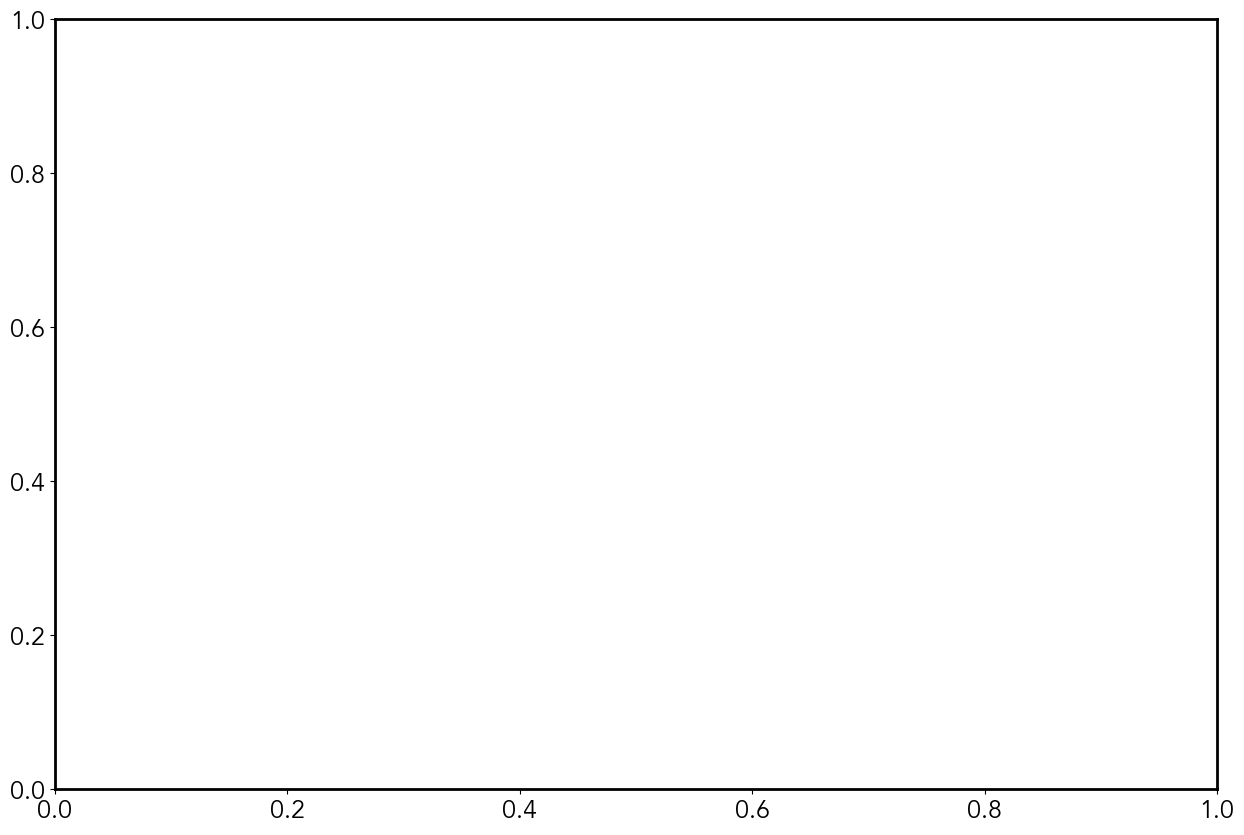

In [57]:
fig = plt.figure(figsize=(15,10))
nv.circos(G_top, node_color_by="Party", group_by="Party", edge_alpha_by="n_ij")
annotate.circos_group(G_top, group_by="Party")
# C.draw()
plt.show()

C:\Users\filip\AppData\Local\Temp/ipykernel_9444/999121464.py:32: MatplotlibDeprecationWarning:

Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().



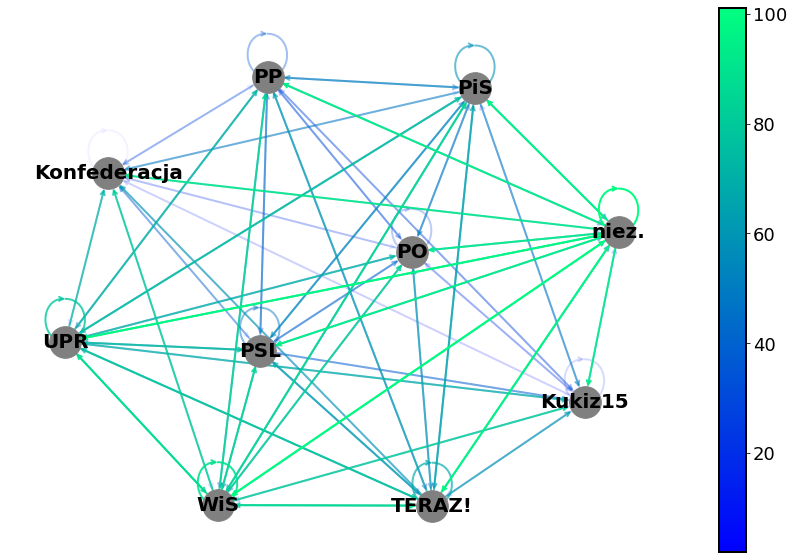

In [193]:
seed = 13648  # Seed random number generators for reproducibility
pos = nx.spring_layout(G_party, seed=seed)
fig = plt.figure(figsize=(15,10))
node_sizes = 1000
M = G_party.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = cm.get_cmap('winter')

nodes = nx.draw_networkx_nodes(G_party, pos, node_size=node_sizes, node_color="gray")
labels = nx.draw_networkx_labels(G_party, pos, font_color="black",font_size=20, font_weight="bold")
edges = nx.draw_networkx_edges(
    G_party,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
)

# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(edge_colors)

ax = plt.gca()
ax.set_axis_off()
plt.colorbar(pc)
plt.savefig('../img/party_network.jpg', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

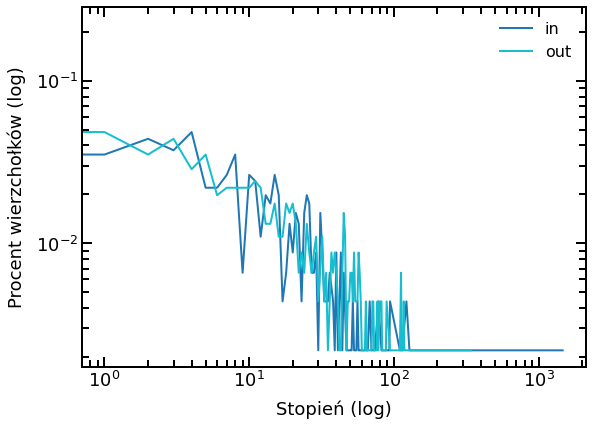

In [93]:
in_aux_x, in_aux_y, out_aux_x, out_aux_y = plot_degree_histogram(G, weight="n_ij", normalized=True)
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0, 0, 1, 1])
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

ax.set_xlabel('Stopień (log)', labelpad=10)
ax.set_ylabel('Procent wierzchołków (log)', labelpad=10)
ax.plot(in_aux_x, in_aux_y, linewidth=2, color=colors(0), label='in')
ax.plot(out_aux_x, out_aux_y, linewidth=2, color=colors(1), label='out')

ax.set_xscale("log")
ax.set_yscale("log")

ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=16)

plt.savefig('../img/deg_dist.eps', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

In [16]:
data_desc = speech_data_org.copy()
data_desc["clean_text"] = data_desc["speech_text"].replace(to_replace = "(@\[0-9A-Za-ząćęłńóśżź,.():]+)|([^0-9A-Za-ząćęłńóśżź,.(): \t])|(\w+:\/\/\S+)|^rt|http.+?|\(.*\)"
                            ,regex=True
                            ,value="")
data_desc["text_lenght"] = data_desc["clean_text"].apply(lambda x: len(x))
data_desc["text_n_words"] = data_desc["clean_text"].apply(lambda x: len(x.split()))
n_speech = len(data_desc)
mean_text_len = np.mean(data_desc["text_lenght"])
std_text_len = np.std(data_desc["text_lenght"])
mean_text_n_words = np.mean(data_desc["text_n_words"])
std_text_n_words = np.std(data_desc["text_n_words"])
n_speech_per_speaker = data_desc["speaker"].value_counts()
mean_n_speech_per_speaker = np.mean(n_speech_per_speaker)
std_n_speech_per_speaker = np.std(n_speech_per_speaker)
n_speech_per_day = pd.DataFrame(data_desc.groupby("date").size(), columns = ["n_speech"]).reset_index()
mean_n_speech_per_day = np.mean(n_speech_per_day)
std_n_speech_per_day = np.std(n_speech_per_day)
n_sittings = len(pd.unique(data_desc["sitting"]))
n_days = len(pd.unique(data_desc["date"]))
n_speakers = len(pd.unique(data_desc["speaker"]))
n_speech_per_month = n_speech_per_day.set_index('date').groupby(pd.Grouper(freq='M'))['n_speech'].sum().reset_index()

e:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [17]:
data_desc_clean = speech_data_clean.copy()
data_desc_clean["clean_text"] = data_desc_clean["speech_text"].replace(to_replace = "(@\[0-9A-Za-ząćęłńóśżź,.():]+)|([^0-9A-Za-ząćęłńóśżź,.(): \t])|(\w+:\/\/\S+)|^rt|http.+?|\(.*\)"
                            ,regex=True
                            ,value="")
data_desc_clean["text_lenght"] = data_desc_clean["clean_text"].apply(lambda x: len(x))
data_desc_clean["text_n_words"] = data_desc_clean["clean_text"].apply(lambda x: len(x.split()))
n_speech_clean = len(data_desc_clean)
mean_text_len_clean = np.mean(data_desc_clean["text_lenght"])
std_text_len_clean = np.std(data_desc_clean["text_lenght"])
mean_text_n_words_clean = np.mean(data_desc_clean["text_n_words"])
std_text_n_words_clean = np.std(data_desc_clean["text_n_words"])
n_speech_per_speaker_clean = data_desc_clean["speaker"].value_counts()
mean_n_speech_per_speaker_clean = np.mean(n_speech_per_speaker_clean)
std_n_speech_per_speaker_clean = np.std(n_speech_per_speaker_clean)
n_speech_per_day_clean = pd.DataFrame(data_desc_clean.groupby("date").size(), columns = ["n_speech"]).reset_index()
mean_n_speech_per_day_clean = np.mean(n_speech_per_day_clean)
std_n_speech_per_day_clean = np.std(n_speech_per_day_clean)
n_sittings_clean = len(pd.unique(data_desc_clean["sitting"]))
n_days_clean = len(pd.unique(data_desc_clean["date"]))
n_speakers_clean = len(pd.unique(data_desc_clean["speaker"]))
n_speech_per_month_clean = n_speech_per_day_clean.set_index('date').groupby(pd.Grouper(freq='M'))['n_speech'].sum().reset_index()

e:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



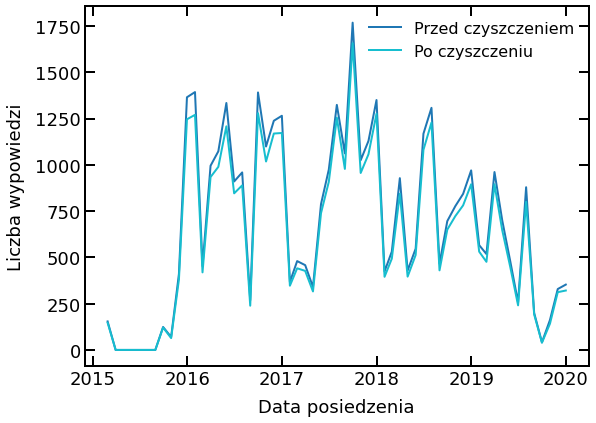

In [19]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0, 0, 1, 1])
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


ax.set_xlabel('Data posiedzenia', labelpad=10)
ax.set_ylabel('Liczba wypowiedzi', labelpad=10)
ax.plot(n_speech_per_month["date"], n_speech_per_month["n_speech"], linewidth=2, color=colors(0), label='Przed czyszczeniem')
ax.plot(n_speech_per_month_clean["date"], n_speech_per_month_clean["n_speech"], linewidth=2, color=colors(1), label='Po czyszczeniu')

ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=16)

plt.savefig('../img/n_speech_per_date.eps', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

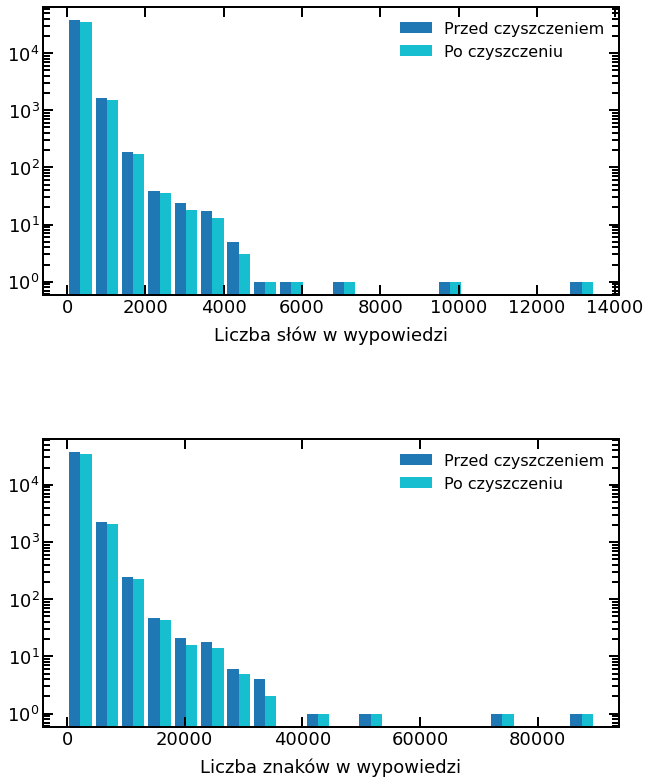

In [23]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_axes([0, 0, 1, 0.4])
ax2 = fig.add_axes([0, 0.6, 1, 0.4])

ax1.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax1.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax1.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax1.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax2.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax2.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


ax1.set_xlabel('Liczba znaków w wypowiedzi', labelpad=10)
ax2.set_xlabel('Liczba słów w wypowiedzi', labelpad=10)


ax1.hist(x=[data_desc["text_lenght"], data_desc_clean["text_lenght"]], bins=20, color=[colors(0), colors(1)],
                            alpha=1, rwidth=0.85, log=True, label=['Przed czyszczeniem', 'Po czyszczeniu'])

ax2.hist(x=[data_desc["text_n_words"], data_desc_clean["text_n_words"]], bins=20, color=[colors(0), colors(1)],
                            alpha=1, rwidth=0.85, log=True, label=['Przed czyszczeniem', 'Po czyszczeniu'])

ax1.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=16)
ax2.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=16)

plt.savefig('../img/text_len_n_words_hist.eps', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

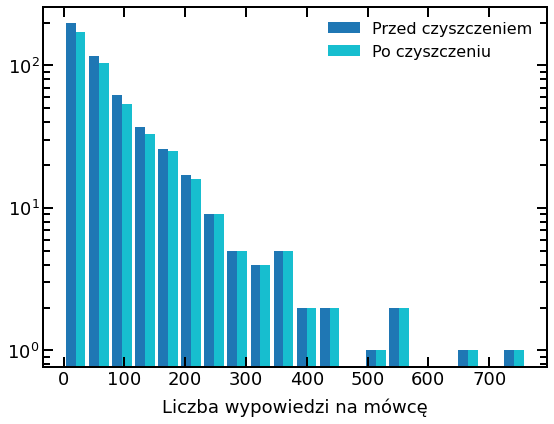

In [24]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0, 0, 1, 1])
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


ax.set_xlabel('Liczba wypowiedzi na mówcę', labelpad=10)


plt.hist(x=[data_desc["speaker"].value_counts(), data_desc_clean["speaker"].value_counts()], bins=20, color=[colors(0), colors(1)],
                            alpha=1, rwidth=0.85, log=True, label=['Przed czyszczeniem', 'Po czyszczeniu'])


ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=16)

plt.savefig('../img/n_speech_per_speaker.eps', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

In [469]:
speech_data_clean["n_mentions_per_speech"] = speech_data_clean.apply(lambda x: len(x.mentions_org), axis=1)
mentions_per_date = (speech_data_clean.set_index('date').groupby(pd.Grouper(freq='M'))['n_mentions_per_speech'].sum() / speech_data_clean.set_index('date').groupby(pd.Grouper(freq='M'))["speech_text_only_author"].count()).reset_index()

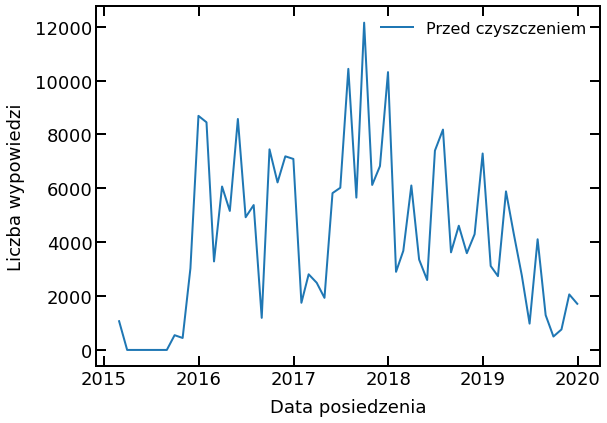

In [461]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0, 0, 1, 1])
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


ax.set_xlabel('Data posiedzenia', labelpad=10)
ax.set_ylabel('Liczba wypowiedzi', labelpad=10)
ax.plot(mentions_per_date["date"], mentions_per_date["n_mentions_per_speech"], linewidth=2, color=colors(0), label='Przed czyszczeniem')

ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=16)

# plt.savefig('../img/n_speech_per_date.eps', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

In [212]:
final_sentiment_data.groupby(["last_name", "mentions"]).sum().reset_index().sort_values(by="mention_sentence_score").head()

,last_name,mentions,Unnamed: 0,mention_sentence_score
3993,Niesiołowski,Macierewicz,1242497,-35.149879
5202,Schetyna,Kaczyński,1240806,-34.783898
5360,Siemoniak,Macierewicz,2276000,-33.403786
4055,Nitras,Kaczyński,1084600,-32.930957
3948,Niedziela,Jurgiel,808047,-28.255155


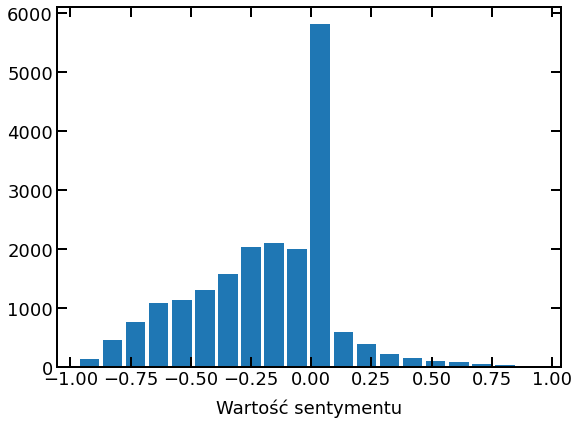

In [318]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0, 0, 1, 1])
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


ax.set_xlabel('Wartość sentymentu', labelpad=10)


plt.hist(x=final_sentiment_data["mention_sentence_score"], bins=20, color=colors(0),
                            alpha=1, rwidth=0.85, log=False)


# ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=16)

plt.savefig('../img/sentiment_score_dist.eps', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

In [359]:
final_sentiment_data_2 = final_sentiment_data.copy()
final_sentiment_data_2["mention_sentence_score_abs"] = np.abs(final_sentiment_data_2["mention_sentence_score"])
worst_sentences = final_sentiment_data_2.sort_values(by="mention_sentence_score")[["mention_sentence" , "mention_sentence_score"]].head()
best_sentences = final_sentiment_data_2.sort_values(by="mention_sentence_score", ascending=False)[["mention_sentence" , "mention_sentence_score"]].head()
neu_sentences = final_sentiment_data_2.sort_values(by="mention_sentence_score_abs", ascending=True)[["mention_sentence" , "mention_sentence_score"]].head(100)

In [16]:
m = (final_sentiment_data.groupby(["party_i", "party_j"]).mean()).mean()["mention_sentence_score"]
sd = (final_sentiment_data.groupby(["party_i", "party_j"]).mean()).std()["mention_sentence_score"]

In [33]:
column_order = ["PiS", "WiS", "Kukiz15", "UPR", "PO", "TERAZ!", "PSL", "Konf.", "PP", "niez."]
column_order_2 = ["PiS", "WiS", "Kukiz15", "UPR", "PO", "PSL", "Konf.", "PP", "niez."]
test = (final_sentiment_data.groupby(["party_i", "party_j"]).mean()).reset_index().sort_values(by="mention_sentence_score").round(2).pivot(index="party_i", columns="party_j", values="mention_sentence_score").reindex(column_order, axis=1).reindex(column_order, axis=0)
test_not_norm = final_sentiment_data.groupby(["party_i", "party_j"]).sum().reset_index().sort_values(by="mention_sentence_score").round(2).pivot(index="party_i", columns="party_j", values="mention_sentence_score").reindex(column_order, axis=1).reindex(column_order, axis=0)

gov_op_sentiment = final_sentiment_data.groupby(["gov_op_i", "gov_op_j"]).sum().reset_index().sort_values(by="mention_sentence_score").round(2).pivot(index="gov_op_i", columns="gov_op_j", values="mention_sentence_score")
gov_op_sentiment_norm = final_sentiment_data.groupby(["gov_op_i", "gov_op_j"]).mean().reset_index().sort_values(by="mention_sentence_score").round(2).pivot(index="gov_op_i", columns="gov_op_j", values="mention_sentence_score")

In [156]:
gov_op_sentiment_norm

gov_op_j,Opozycja,Rząd
gov_op_i,,
Opozycja,-0.18,-0.24
Rząd,-0.19,-0.04


In [14]:
test3 = final_sentiment_data.groupby(["party_i", "party_j"]).median().reset_index().sort_values(by="mention_sentence_score").round(2).pivot(index="party_i", columns="party_j", values="mention_sentence_score").reindex(column_order, axis=1).reindex(column_order, axis=0)

In [40]:
worst_speakers = (final_sentiment_data.groupby(["last_name"]).sum()).reset_index().sort_values(by="mention_sentence_score").round(2).head(10)[::-1]
worst_speakers_norm = (final_sentiment_data.groupby(["last_name"]).mean()).reset_index().sort_values(by="mention_sentence_score").round(2).head(10)[::-1]
best_speakers = (final_sentiment_data.groupby(["last_name"]).sum()).reset_index().sort_values(by="mention_sentence_score").round(2).tail(10)[::-1]
best_speakers_norm = (final_sentiment_data.groupby(["last_name"]).mean()).reset_index().sort_values(by="mention_sentence_score").round(2).tail(10)[::-1]
sentiment_speakers = pd.concat([worst_speakers, best_speakers]).sort_values(by="mention_sentence_score")
sentiment_speakers["color"] = sentiment_speakers.apply(lambda x: "darkred" if x.mention_sentence_score < 0 else "green", axis=1)
sentiment_speakers_norm = pd.concat([worst_speakers_norm, best_speakers_norm]).sort_values(by="mention_sentence_score")
sentiment_speakers_norm["color"] = sentiment_speakers_norm.apply(lambda x: "darkred" if x.mention_sentence_score < 0 else "green", axis=1)

worst_mentions = (final_sentiment_data.groupby(["mentions"]).sum()).reset_index().sort_values(by="mention_sentence_score").round(2).head(10)[::-1]
worst_mentions_norm = (final_sentiment_data.groupby(["mentions"]).mean()).reset_index().sort_values(by="mention_sentence_score").round(2).head(10)[::-1]
best_mentions = (final_sentiment_data.groupby(["mentions"]).sum()).reset_index().sort_values(by="mention_sentence_score").round(2).tail(10)[::-1]
best_mentions_norm = (final_sentiment_data.groupby(["mentions"]).mean()).reset_index().sort_values(by="mention_sentence_score").round(2).tail(10)[::-1]
sentiment_mentions = pd.concat([worst_mentions, best_mentions]).sort_values(by="mention_sentence_score")
sentiment_mentions_norm = pd.concat([worst_mentions_norm, best_mentions_norm]).sort_values(by="mention_sentence_score")
sentiment_mentions["color"] = sentiment_mentions.apply(lambda x: "darkred" if x.mention_sentence_score < 0 else "green", axis=1)
sentiment_mentions_norm["color"] = sentiment_mentions_norm.apply(lambda x: "darkred" if x.mention_sentence_score < 0 else "green", axis=1)

In [41]:
party_speaker_sentiment = final_sentiment_data.groupby("party_i").sum().reset_index().sort_values(by="mention_sentence_score").round(2).set_index("party_i").loc[column_order].reset_index()
party_speaker_sentiment_norm = (final_sentiment_data.groupby("party_i").mean()).reset_index().sort_values(by="mention_sentence_score").set_index("party_i").round(2).loc[column_order].reset_index()
party_speaker_sentiment["color"] = party_speaker_sentiment.apply(lambda x: "darkred" if x.mention_sentence_score < 0 else "green", axis=1)
party_speaker_sentiment_norm["color"] = party_speaker_sentiment_norm.apply(lambda x: "darkred" if x.mention_sentence_score < 0 else "green", axis=1)

party_mention_sentiment = final_sentiment_data.groupby("party_j").sum().reset_index().sort_values(by="mention_sentence_score").set_index("party_j").round(2).loc[column_order_2].reset_index()
party_mention_sentiment_norm = (final_sentiment_data.groupby("party_j").mean()).reset_index().sort_values(by="mention_sentence_score").set_index("party_j").round(2).loc[column_order_2].reset_index()
party_mention_sentiment["color"] = party_mention_sentiment.apply(lambda x: "darkred" if x.mention_sentence_score < 0 else "green", axis=1)
party_mention_sentiment_norm["color"] = party_mention_sentiment_norm.apply(lambda x: "darkred" if x.mention_sentence_score < 0 else "green", axis=1)

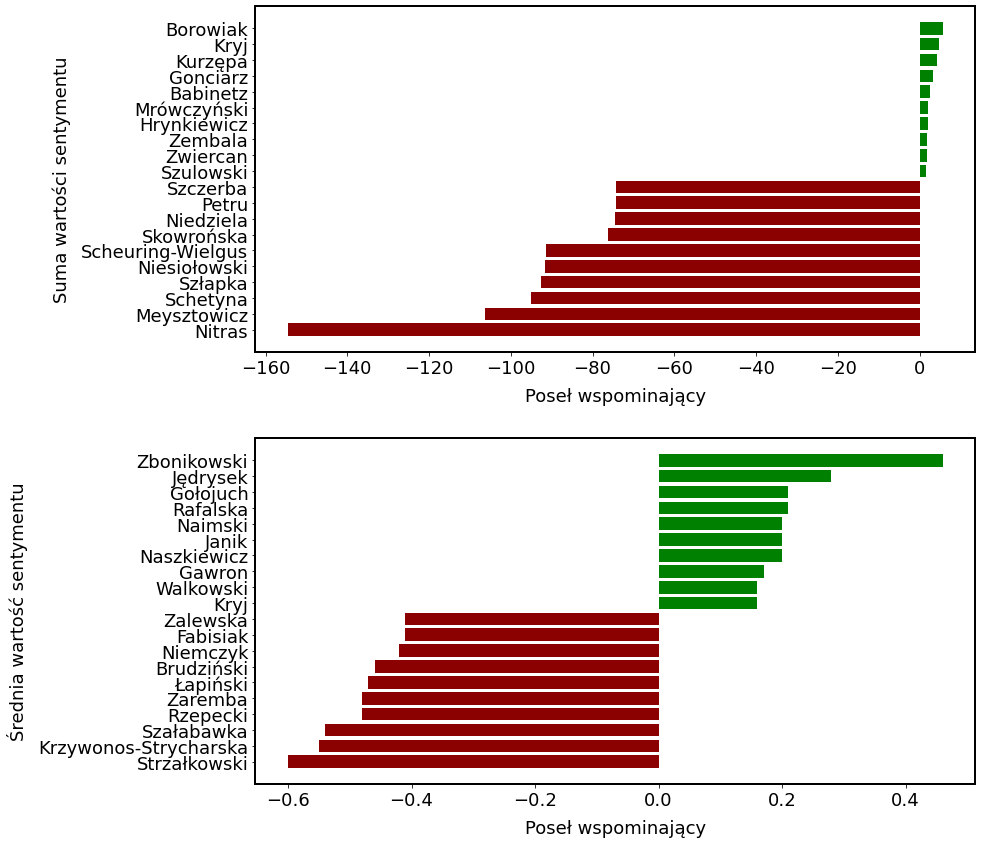

In [133]:
f= plt.figure(figsize=(10, 12))
ax1 = f.add_axes([0, 0.5, 1, 0.4])
ax2 = f.add_axes([0, 0, 1, 0.4])

ax1.barh(y=sentiment_speakers["last_name"], width=sentiment_speakers["mention_sentence_score"], color=sentiment_speakers["color"])
ax2.barh(y=sentiment_speakers_norm["last_name"], width=sentiment_speakers_norm["mention_sentence_score"], color=sentiment_speakers_norm["color"])

ax1.set_xlabel('Poseł wspominający', labelpad=10)
ax1.set_ylabel('Suma wartości sentymentu', labelpad=10)
ax2.set_xlabel('Poseł wspominający', labelpad=10)
ax2.set_ylabel('Średnia wartość sentymentu', labelpad=10)
plt.savefig('../img/speakers_sentiment.eps', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

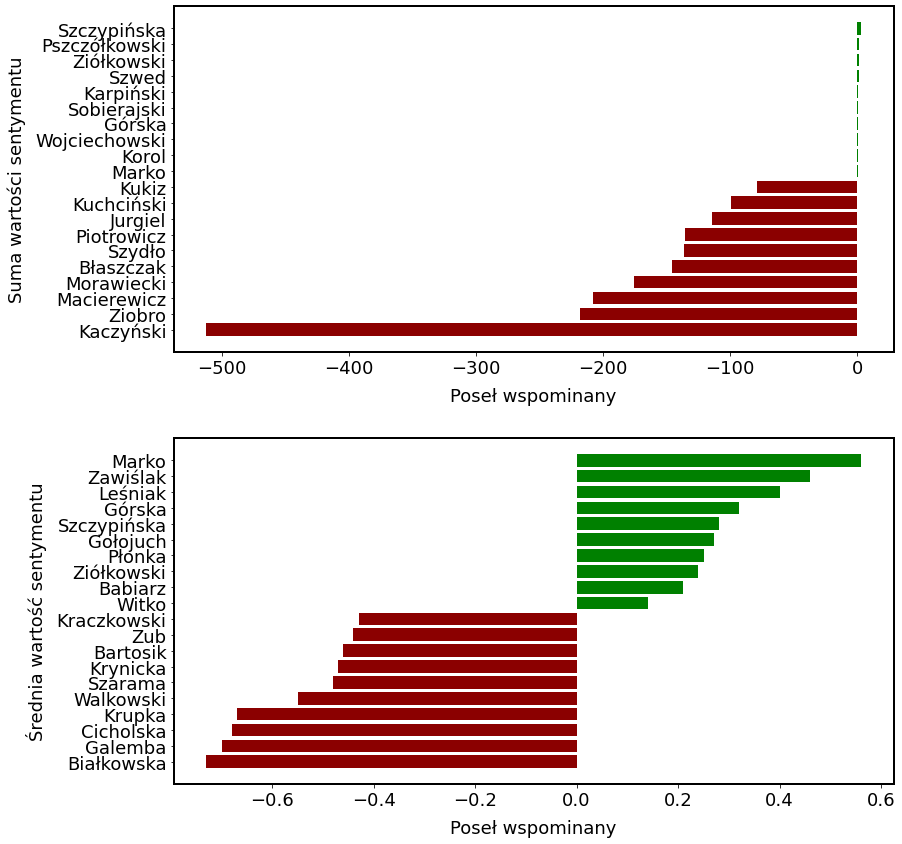

In [137]:
f= plt.figure(figsize=(10, 12))
ax1 = f.add_axes([0, 0.5, 1, 0.4])
ax2 = f.add_axes([0, 0, 1, 0.4])

ax1.barh(y=sentiment_mentions["mentions"], width=sentiment_mentions["mention_sentence_score"], color=sentiment_mentions["color"])
ax2.barh(y=sentiment_mentions_norm["mentions"], width=sentiment_mentions_norm["mention_sentence_score"], color=sentiment_mentions_norm["color"])

ax1.set_xlabel('Poseł wspominany', labelpad=10)
ax1.set_ylabel('Suma wartości sentymentu', labelpad=10)
ax2.set_xlabel('Poseł wspominany', labelpad=10)
ax2.set_ylabel('Średnia wartość sentymentu', labelpad=10)
plt.savefig('../img/mentions_sentiment.eps', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

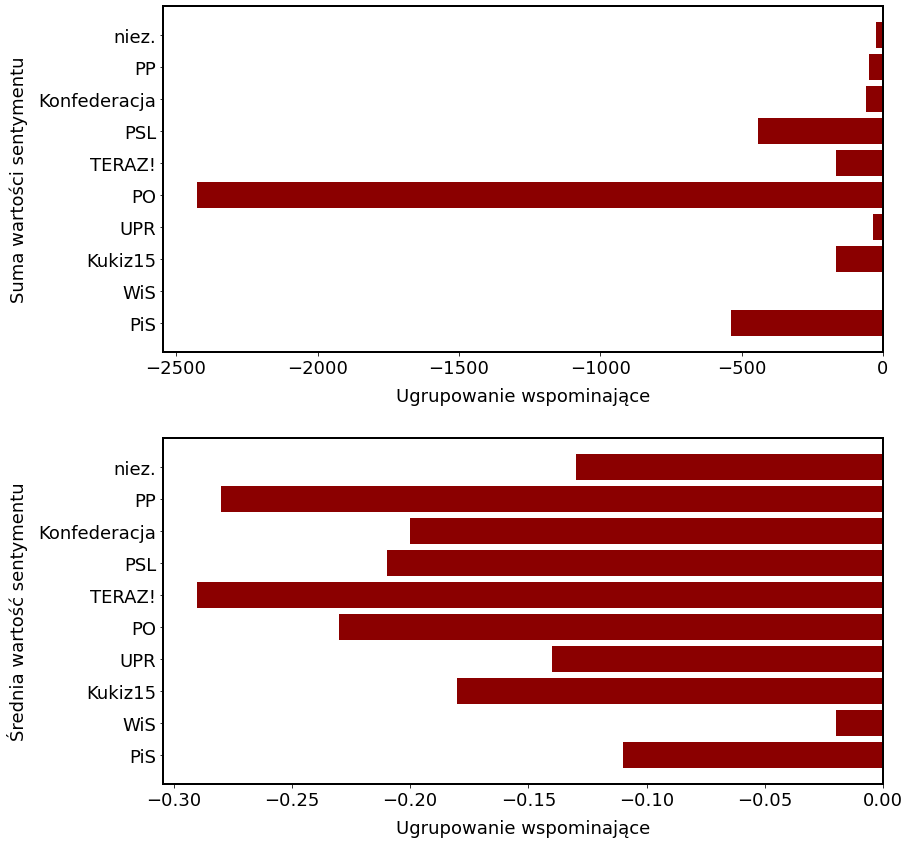

In [147]:
f= plt.figure(figsize=(10, 12))
ax1 = f.add_axes([0, 0.5, 1, 0.4])
ax2 = f.add_axes([0, 0, 1, 0.4])

ax1.barh(y=party_speaker_sentiment["party_i"], width=party_speaker_sentiment["mention_sentence_score"], color=party_speaker_sentiment["color"])
ax2.barh(y=party_speaker_sentiment_norm["party_i"], width=party_speaker_sentiment_norm["mention_sentence_score"], color=party_speaker_sentiment_norm["color"])

ax1.set_xlabel('Ugrupowanie wspominające', labelpad=10)
ax1.set_ylabel('Suma wartości sentymentu', labelpad=10)
ax2.set_xlabel('Ugrupowanie wspominające', labelpad=10)
ax2.set_ylabel('Średnia wartość sentymentu', labelpad=10)
plt.savefig('../img/party_speaker_sentiment.eps', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

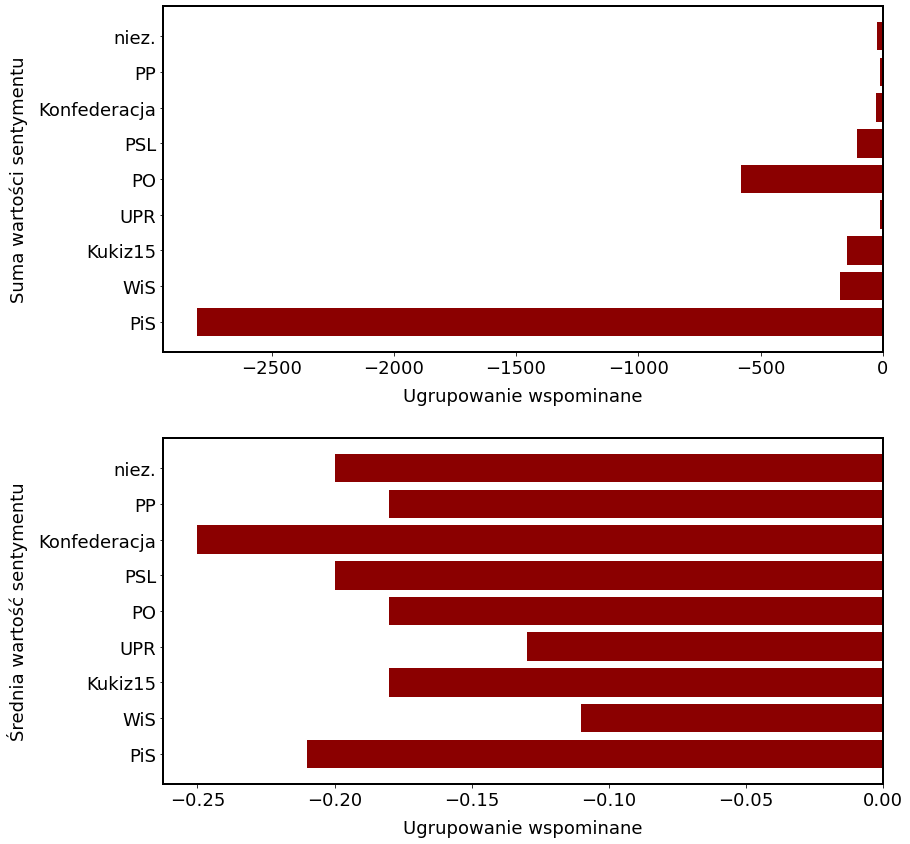

In [148]:
f= plt.figure(figsize=(10, 12))
ax1 = f.add_axes([0, 0.5, 1, 0.4])
ax2 = f.add_axes([0, 0, 1, 0.4])

ax1.barh(y=party_mention_sentiment["party_j"], width=party_mention_sentiment["mention_sentence_score"], color=party_mention_sentiment["color"])
ax2.barh(y=party_mention_sentiment_norm["party_j"], width=party_mention_sentiment_norm["mention_sentence_score"], color=party_mention_sentiment_norm["color"])

ax1.set_xlabel('Ugrupowanie wspominane', labelpad=10)
ax1.set_ylabel('Suma wartości sentymentu', labelpad=10)
ax2.set_xlabel('Ugrupowanie wspominane', labelpad=10)
ax2.set_ylabel('Średnia wartość sentymentu', labelpad=10)
plt.savefig('../img/party_mention_sentiment.eps', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

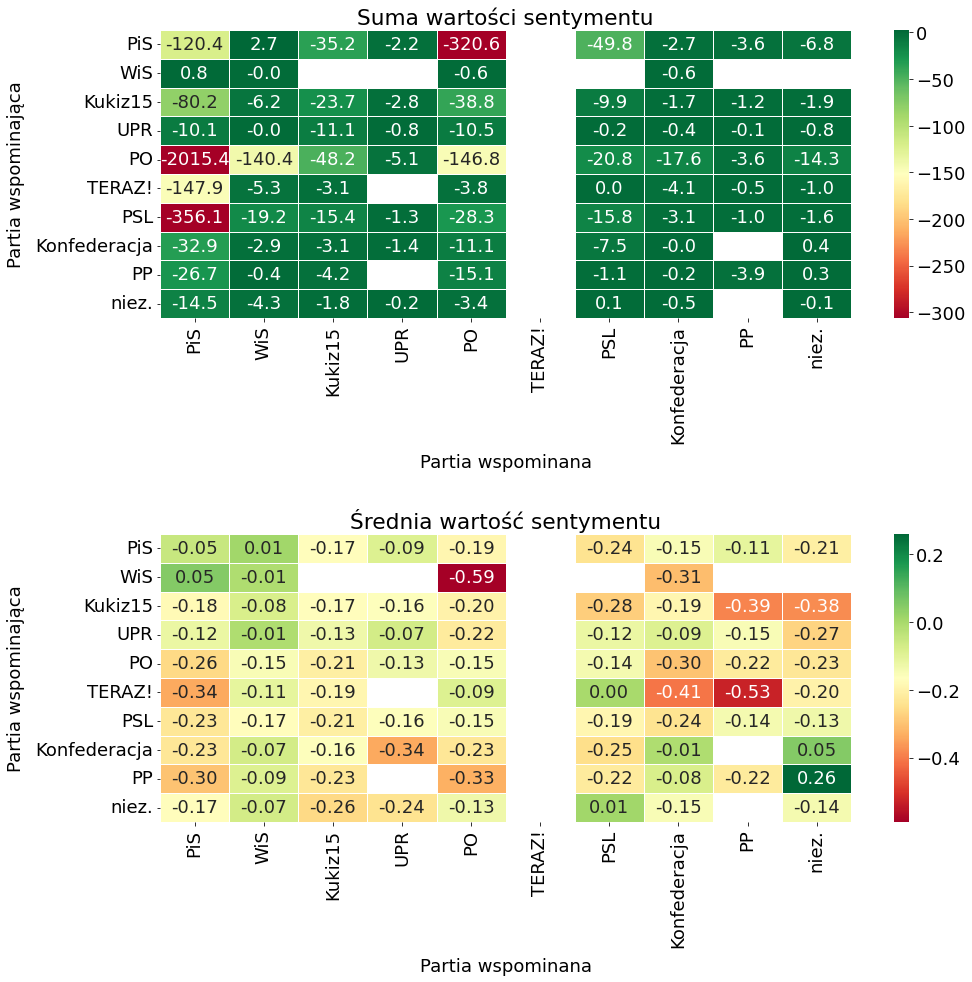

In [98]:
f= plt.figure(figsize=(12, 10))
ax1 = f.add_axes([0, 0.7, 1, 0.4])
ax2 = f.add_axes([0, 0, 1, 0.4])
heat = sns.heatmap(test_not_norm, annot=True, fmt=".1f", linewidths=.5, ax=ax1, cmap=cm.get_cmap('RdYlGn'),vmin=-306)
heat = sns.heatmap(test, annot=True, fmt=".2f", linewidths=.5, ax=ax2, cmap=cm.get_cmap('RdYlGn'))

ax1.set_xlabel('Partia wspominana', labelpad=10)
ax1.set_ylabel('Partia wspominająca', labelpad=10)
ax1.set_title('Suma wartości sentymentu')
ax2.set_xlabel('Partia wspominana', labelpad=10)
ax2.set_ylabel('Partia wspominająca', labelpad=10)
ax2.set_title('Średnia wartość sentymentu')
plt.savefig('../img/sentiment_heatmap.eps', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

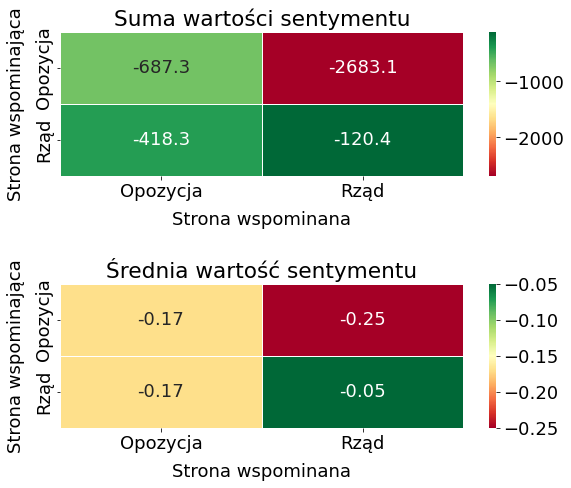

In [166]:
f= plt.figure(figsize=(7, 5))
ax1 = f.add_axes([0, 0.7, 1, 0.4])
ax2 = f.add_axes([0, 0, 1, 0.4])
heat = sns.heatmap(gov_op_sentiment, annot=True, fmt=".1f", linewidths=.5, ax=ax1, cmap=cm.get_cmap('RdYlGn'))
heat = sns.heatmap(gov_op_sentiment_norm, annot=True, fmt=".2f", linewidths=.5, ax=ax2, cmap=cm.get_cmap('RdYlGn'))

ax1.set_xlabel('Strona wspominana', labelpad=10)
ax1.set_ylabel('Strona wspominająca', labelpad=10)
ax1.set_title('Suma wartości sentymentu')
ax2.set_xlabel('Strona wspominana', labelpad=10)
ax2.set_ylabel('Strona wspominająca', labelpad=10)
ax2.set_title('Średnia wartość sentymentu')
plt.savefig('../img/sentiment_gov_op_heatmap.eps', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

In [332]:
final_prob_data[final_prob_data.under].sort_values(by="p_model_ij", ascending=False).head()

,Unnamed: 0,i,j,p_model_ij,p_ij,n_ij,under,over,party_i,party_j
158490,158490,Skowrońska,Kaczyński,0.001687,0.000326,5.0,True,False,PO,PiS
80230,80230,Kosiniak-Kamysz,Kaczyński,0.001200,0.000718,11.0,True,False,PSL,PiS
112314,112314,Meysztowicz,Szydło,0.001179,0.000653,10.0,True,False,PO,PiS
57025,57025,Hennig-Kloska,Kaczyński,0.001156,0.000653,10.0,True,False,PO,PiS
172248,172248,Szłapka,Morawiecki,0.001155,0.000131,2.0,True,False,PO,WiS


In [333]:
final_prob_data[final_prob_data.over].sort_values(by="p_model_ij", ascending=False).head()

,Unnamed: 0,i,j,p_model_ij,p_ij,n_ij,under,over,party_i,party_j
126640,126640,Nitras,Kaczyński,0.002144,0.003330,51.0,False,True,PO,PiS
112080,112080,Meysztowicz,Kaczyński,0.002000,0.004309,66.0,False,True,PO,PiS
168955,168955,Szczerba,Kaczyński,0.001612,0.002416,37.0,False,True,PO,PiS
164513,164513,Sowa,Morawiecki,0.001537,0.003134,48.0,False,True,PO,WiS
172140,172140,Szłapka,Kaczyński,0.001475,0.003265,50.0,False,True,PO,PiS


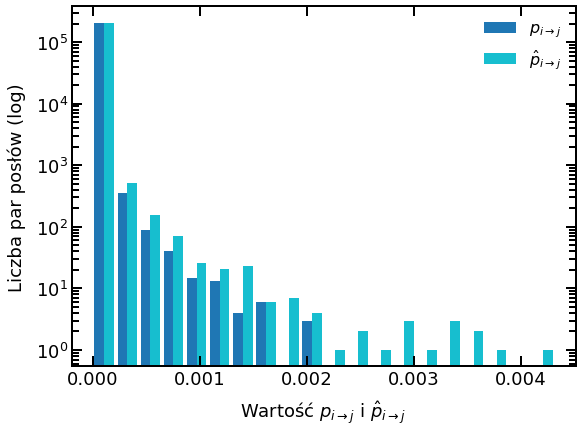

In [452]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0, 0, 1, 1])
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')


ax.set_xlabel(r'Wartość $p_{i\rightarrow j}$ i $\hat{p}_{i\rightarrow j}$', labelpad=10)
ax.set_ylabel(r'Liczba par posłów (log)', labelpad=10)


plt.hist(x=[final_prob_data["p_model_ij"], final_prob_data["p_ij"]], bins=20, color=[colors(0), colors(1)],
                            alpha=1, rwidth=0.85, log=True, label=[r"$p_{i\rightarrow j}$", r"$\hat{p}_{i\rightarrow j}$"])


ax.legend(bbox_to_anchor=(1, 1), loc=1, frameon=False, fontsize=16)

plt.savefig('../img/prob_dist.eps', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

In [34]:
m_prob = (final_prob_data.groupby(["party_i", "party_j"]).mean()).mean()
sd_prob = (final_prob_data.groupby(["party_i", "party_j"]).mean()).std()

prob_party_mean = ((final_prob_data.groupby(["party_i", "party_j"]).mean() -m_prob)/sd_prob).reset_index().pivot(index="party_i", columns="party_j", values="p_ij").reindex(column_order, axis=1).reindex(column_order, axis=0)
prob_party_mean = ((final_prob_data.groupby(["party_i", "party_j"]).mean() -m_prob)/sd_prob).reset_index().pivot(index="party_i", columns="party_j", values="p_ij").reindex(column_order, axis=1).reindex(column_order, axis=0)

under_party = (final_prob_data.groupby(["party_i", "party_j"]).sum()).reset_index().pivot(index="party_i", columns="party_j", values="under").reindex(column_order, axis=1).reindex(column_order, axis=0)
over_party = (final_prob_data.groupby(["party_i", "party_j"]).sum()).reset_index().pivot(index="party_i", columns="party_j", values="over").reindex(column_order, axis=1).reindex(column_order, axis=0)

under_party_not_norm = (final_prob_data.groupby(["party_i", "party_j"]).mean()).reset_index().pivot(index="party_i", columns="party_j", values="under").reindex(column_order, axis=1).reindex(column_order, axis=0)
over_party_not_norm = (final_prob_data.groupby(["party_i", "party_j"]).mean()).reset_index().pivot(index="party_i", columns="party_j", values="over").reindex(column_order, axis=1).reindex(column_order, axis=0)

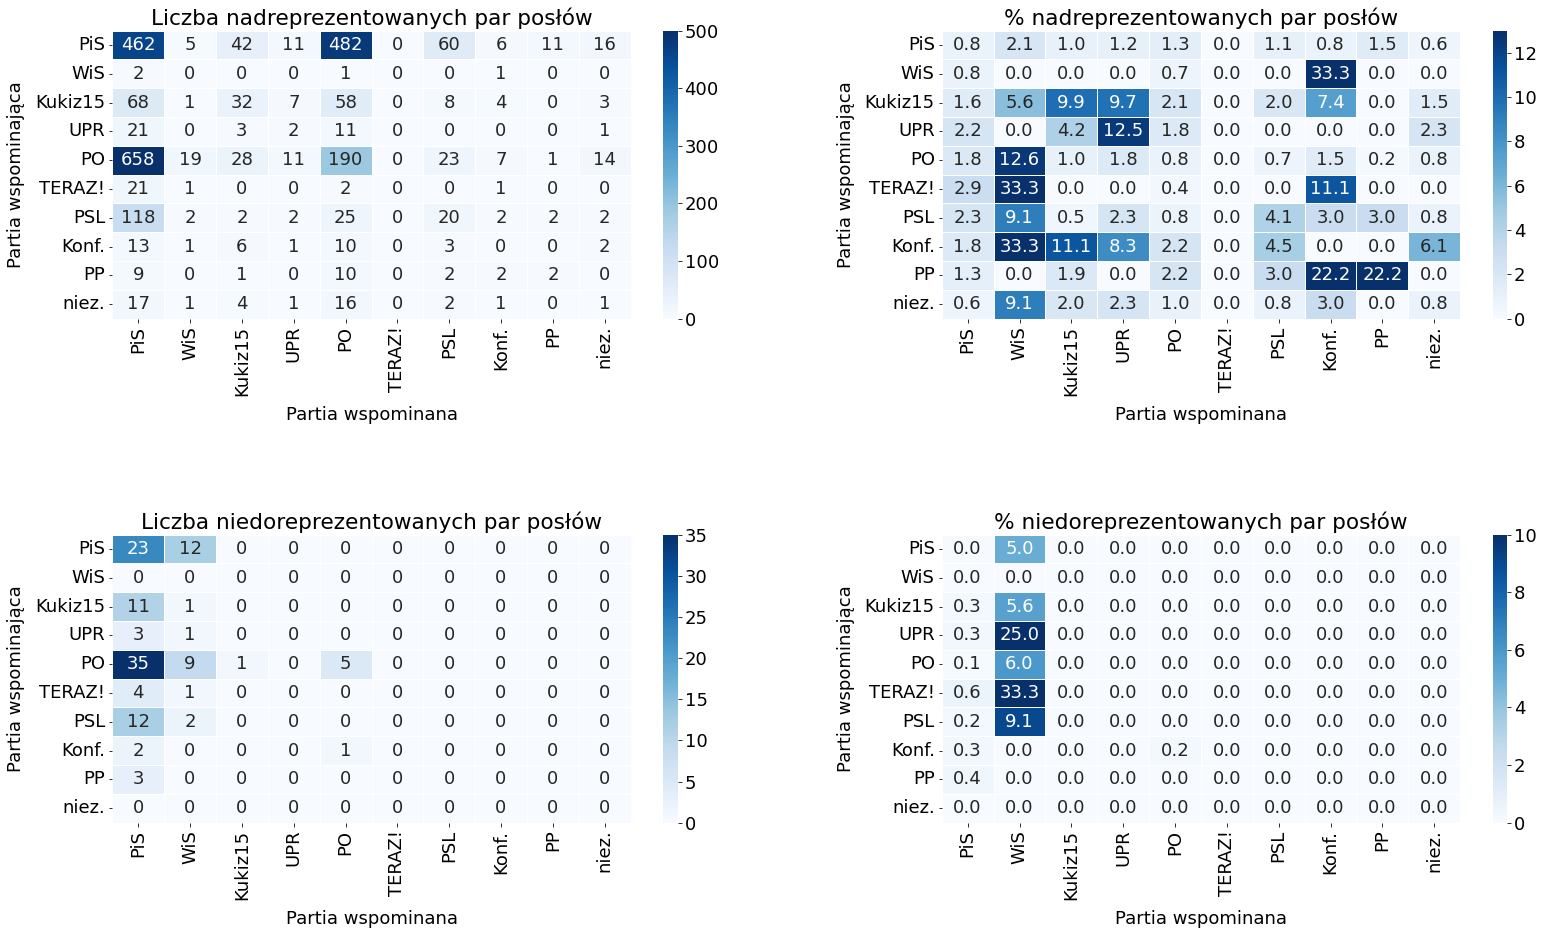

In [39]:
f= plt.figure(figsize=(9, 10))
ax1 = f.add_axes([0, 0, 1, 0.4])
ax2 = f.add_axes([0, 0.7, 1, 0.4])
ax3 = f.add_axes([1.28, 0, 1, 0.4])
ax4 = f.add_axes([1.28, 0.7, 1, 0.4])
heat = sns.heatmap(under_party, annot=True, fmt="d", linewidths=.5, ax=ax1, cmap=cm.get_cmap('Blues'))
heat = sns.heatmap(over_party, annot=True, fmt="d", linewidths=.5, ax=ax2, cmap=cm.get_cmap('Blues'),vmax=500)
heat = sns.heatmap(under_party_not_norm*100, annot=True, fmt=".1f", linewidths=.5, ax=ax3, cmap=cm.get_cmap('Blues'), vmax=10)
heat = sns.heatmap(over_party_not_norm*100, annot=True, fmt=".1f", linewidths=.5, ax=ax4, cmap=cm.get_cmap('Blues'), vmax=13)

ax1.set_xlabel('Partia wspominana', labelpad=10)
ax1.set_ylabel('Partia wspominająca', labelpad=10)
ax1.set_title('Liczba niedoreprezentowanych par posłów')
ax2.set_xlabel('Partia wspominana', labelpad=10)
ax2.set_ylabel('Partia wspominająca', labelpad=10)
ax2.set_title('Liczba nadreprezentowanych par posłów')
ax3.set_xlabel('Partia wspominana', labelpad=10)
ax3.set_ylabel('Partia wspominająca', labelpad=10)
ax3.set_title('% niedoreprezentowanych par posłów')
ax4.set_xlabel('Partia wspominana', labelpad=10)
ax4.set_ylabel('Partia wspominająca', labelpad=10)
ax4.set_title("% nadreprezentowanych par posłów")
plt.savefig('../img/under_over_heatmap.eps', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

In [69]:
count_mention_party = final_sentiment_data.groupby(["party_i", "party_j"]).count().reset_index().pivot(index="party_i", columns="party_j", values="mention_sentence_score").reindex(column_order, axis=1).reindex(column_order, axis=0).fillna(0).astype(int)

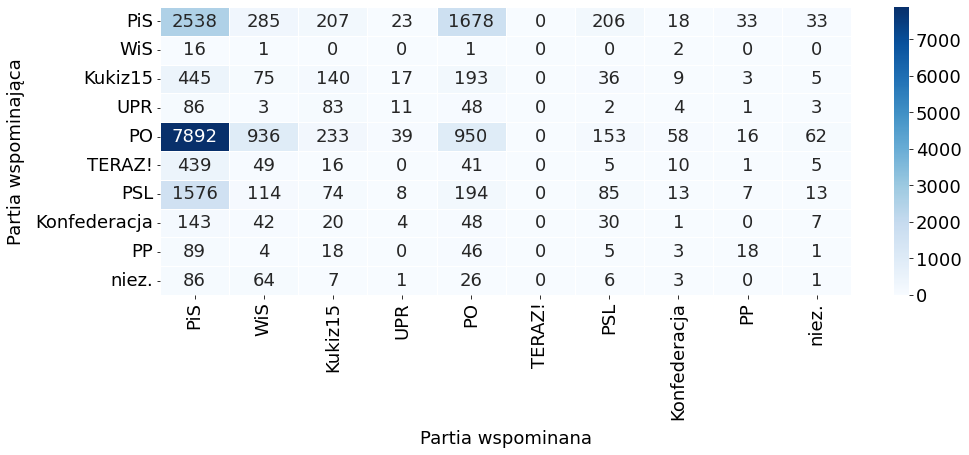

In [82]:
f= plt.figure(figsize=(12, 10))
ax1 = f.add_axes([0, 0.7, 1, 0.4])
heat = sns.heatmap(count_mention_party, annot=True, fmt="d", linewidths=.5, ax=ax1, cmap=cm.get_cmap('Blues'))

ax1.set_xlabel('Partia wspominana', labelpad=10)
ax1.set_ylabel('Partia wspominająca', labelpad=10)
plt.savefig('../img/mention_count_party.eps', dpi=300, transparent=False, bbox_inches='tight')
plt.show()